# TAXI FARE ANALYSIS NYC

<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [4]:
taxi_jan_2025 = pd.read_parquet('data/yellow_tripdata_2025-01.parquet')
taxi_data = pd.concat([taxi_jan_2025])

# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [6]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 
                       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 
                       'DOLocationID', 'payment_type', 'total_amount']]

In [7]:
print(taxi_data.shape)
taxi_data.head()

(3475226, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,18.00
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,12.12
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,12.10
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,9.70
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,8.30


In [8]:
taxi_data.hist(figsize=(20,10), bins=60)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

In [9]:
#plt.hist(taxi_data, bins=60)

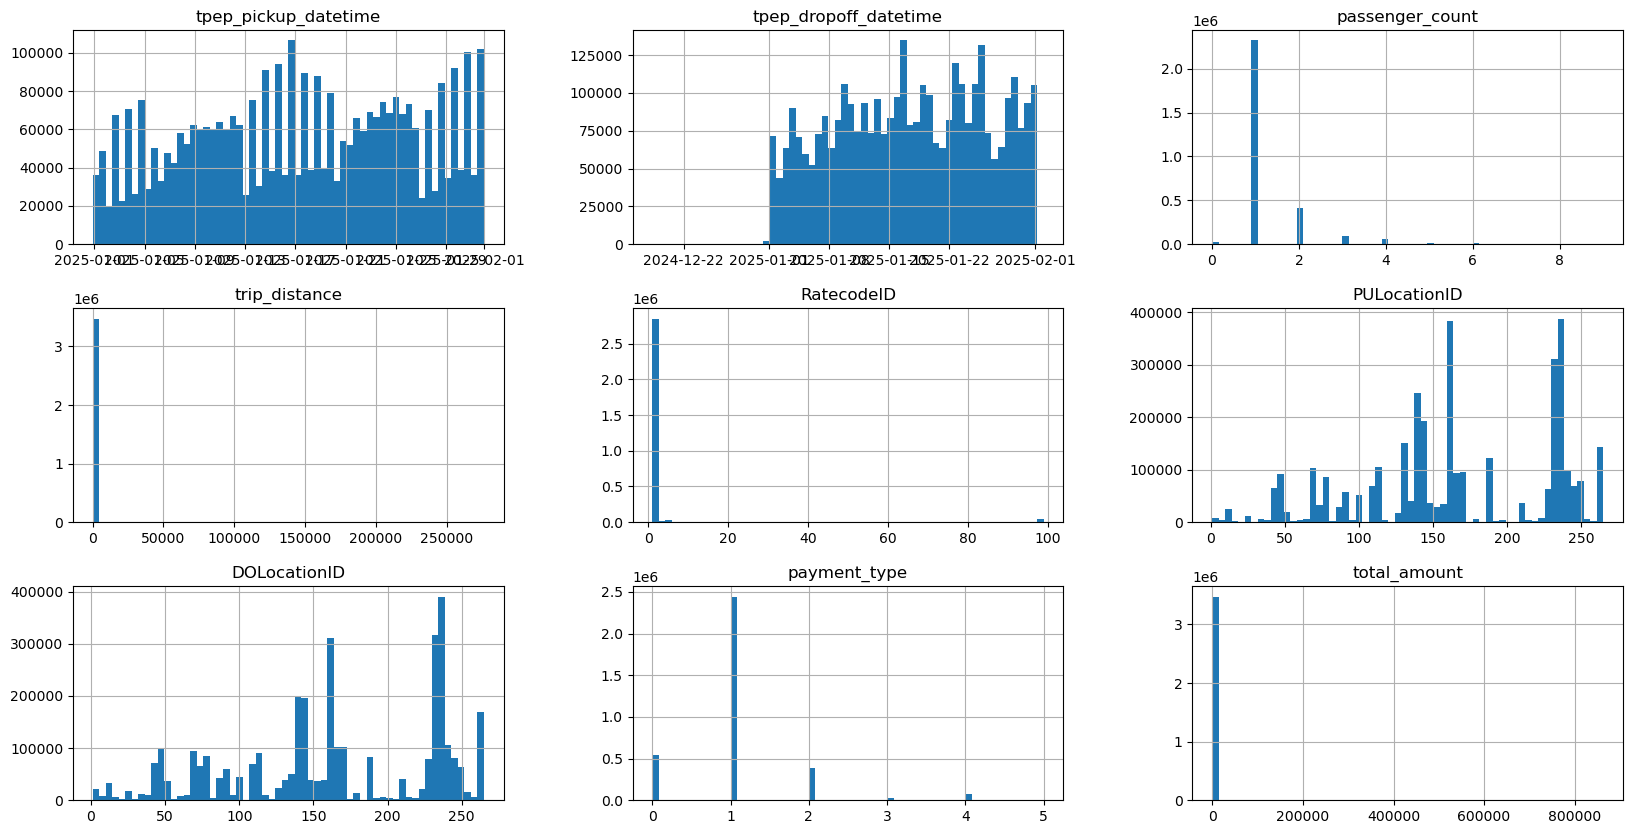

In [10]:
plt.show()

In [11]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2756472
2.0       94420
99.0      41963
5.0       26501
3.0        8622
4.0        7092
6.0           7
Name: count, dtype: int64

In [12]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

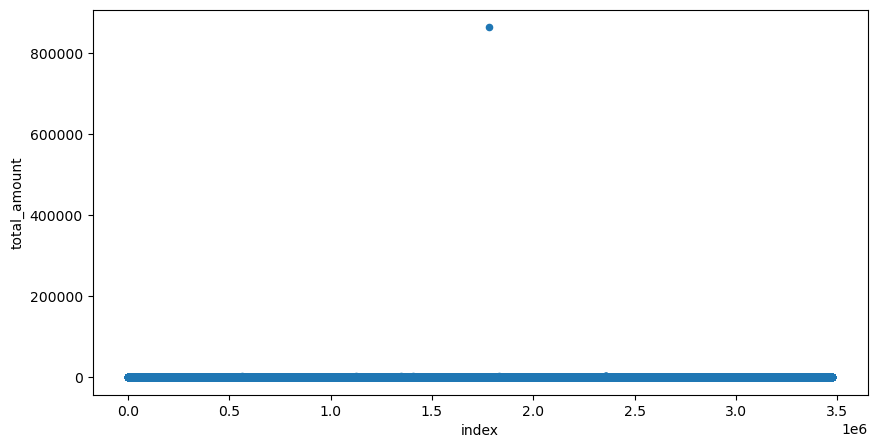

In [13]:
plt.show()

In [14]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

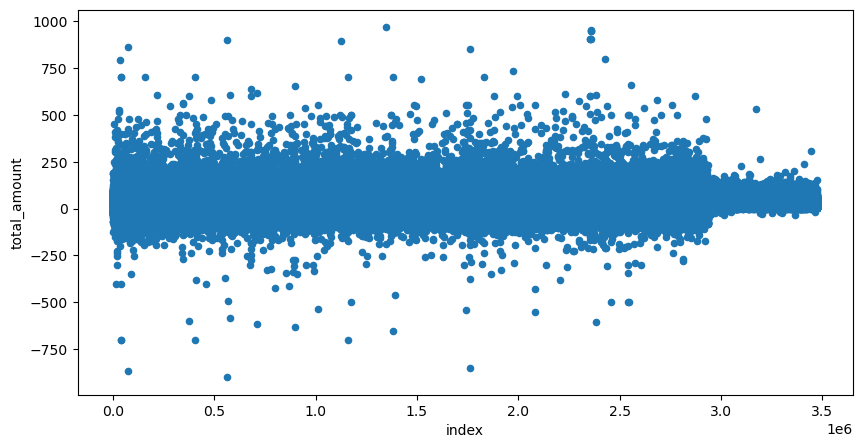

In [15]:
plt.show()

In [16]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(63037, 9)


<Axes: xlabel='index', ylabel='total_amount'>

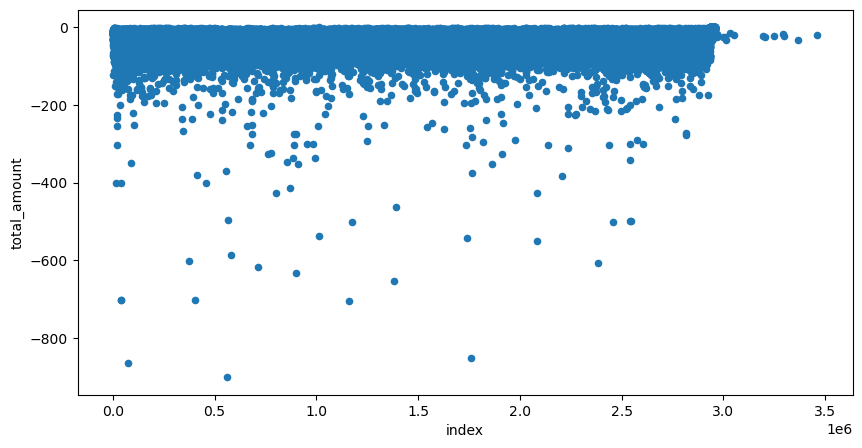

In [17]:
plt.show()

In [18]:
taxi_data[taxi_data['total_amount']<0].head(20)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
17,2025-01-01 00:01:41,2025-01-01 00:07:14,1.0,0.71,1.0,79,107,2,-8.54
22,2025-01-01 00:55:54,2025-01-01 01:00:38,1.0,0.69,1.0,137,233,4,-11.50
104,2025-01-01 00:56:12,2025-01-01 01:15:00,1.0,0.97,1.0,161,170,4,-21.30
149,2025-01-01 00:55:53,2025-01-01 01:06:49,1.0,1.42,1.0,79,45,2,-17.10
202,2025-01-01 00:29:35,2025-01-01 00:36:02,1.0,0.60,1.0,79,148,4,-12.20
212,2025-01-01 00:11:44,2025-01-01 00:25:41,2.0,1.88,1.0,79,161,4,-19.20
364,2025-01-01 00:11:58,2025-01-01 00:12:31,1.0,0.01,1.0,42,42,4,-5.50
400,2025-01-01 00:09:58,2025-01-01 00:14:28,1.0,0.60,1.0,140,263,2,-11.50
492,2025-01-01 00:50:13,2025-01-01 01:11:20,1.0,3.84,1.0,48,151,2,-29.00
640,2025-01-01 00:51:05,2025-01-01 00:54:12,1.0,0.92,1.0,142,239,2,-11.50


In [19]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    37410
2    14111
3     8080
0     3421
1       15
Name: count, dtype: int64

In [20]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

<Axes: >

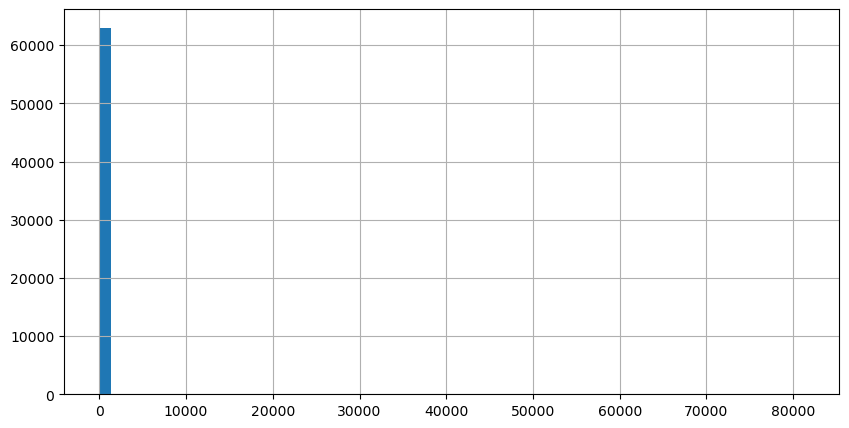

In [21]:
plt.show()

In [22]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(559, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
10261,2025-01-01 01:30:13,2025-01-01 01:30:31,1.0,0.00,1.0,226,226,2,0.0
18189,2025-01-01 03:57:21,2025-01-01 04:02:26,1.0,0.40,1.0,158,125,3,0.0
19155,2025-01-01 03:27:25,2025-01-01 03:43:43,1.0,3.50,1.0,144,163,4,0.0
21300,2025-01-01 04:03:25,2025-01-01 04:11:42,2.0,4.69,1.0,255,97,2,0.0
21920,2025-01-01 04:24:55,2025-01-01 04:29:57,4.0,1.72,1.0,7,7,2,0.0


In [23]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
4    238
3    155
1     78
0     47
2     40
5      1
Name: count, dtype: int64

In [24]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

<Axes: >

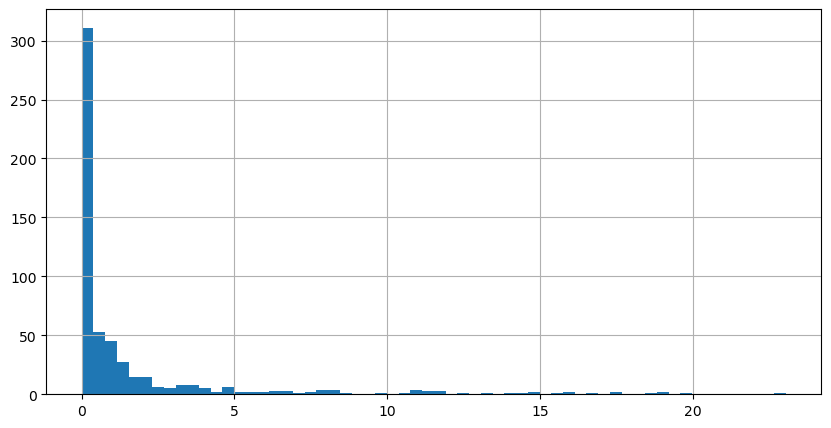

In [25]:
plt.show()

In [26]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     262
0.10      19
0.50      17
0.40      15
0.30      14
        ... 
1.46       1
6.60       1
1.72       1
1.45       1
14.68      1
Name: count, Length: 112, dtype: int64

In [27]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

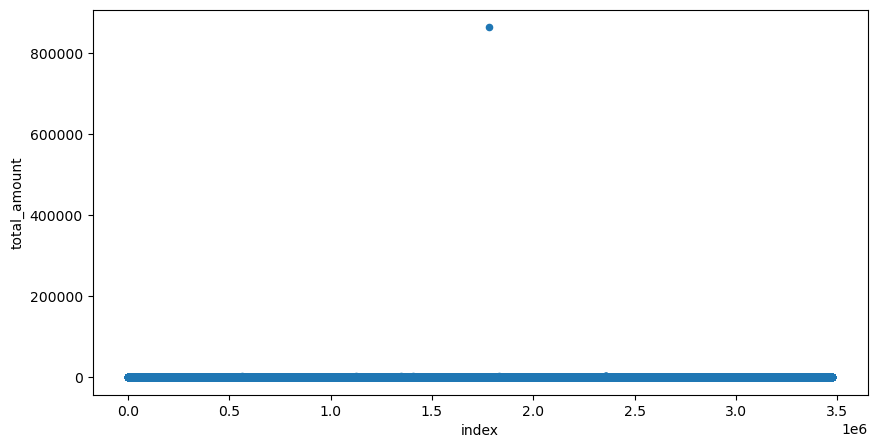

In [28]:
plt.show()

In [29]:
taxi_data[taxi_data['total_amount']>200].shape

(1913, 9)

In [30]:
taxi_data['total_amount'].mean()

25.61129169728817

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [31]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [32]:
taxi_data.shape

(3475226, 9)

In [33]:
taxi_data_filtered.shape

(3410271, 9)

In [34]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          536722
trip_distance                 0
RatecodeID               536722
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [35]:
taxi_data_filtered2 = taxi_data_filtered.dropna()

In [36]:
taxi_data_filtered2.shape

(2873549, 9)

In [37]:
taxi_data_filtered2.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [38]:
taxi_data_prepared = taxi_data_filtered2.copy()

In [39]:
taxi_data_prepared.shape

(2873549, 9)

In [40]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [41]:
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/2820828323.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/2820828323.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['229' '236' '141' ... '142' '230' '140']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/2820828323.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [42]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [43]:
taxi_data_prepared.loc[:,'passenger_count']   = taxi_data_prepared['passenger_count'].astype(int)

In [44]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [45]:
taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].astype(np.int64)

In [46]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [47]:
taxi_data_prepared.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1,1.60,1.0,229,237,1,18.00
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1,0.50,1.0,236,237,1,12.12
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1,0.60,1.0,141,141,1,12.10
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3,0.52,1.0,244,244,2,9.70
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3,0.66,1.0,244,116,2,8.30
5,2025-01-01 00:48:24,2025-01-01 01:08:26,2,2.63,1.0,239,68,2,24.10
6,2025-01-01 00:14:47,2025-01-01 00:16:15,0,0.40,1.0,170,170,1,11.75
7,2025-01-01 00:39:27,2025-01-01 00:51:51,0,1.60,1.0,234,148,1,19.10
8,2025-01-01 00:53:43,2025-01-01 01:13:23,0,2.80,1.0,148,170,1,27.10
9,2025-01-01 00:00:02,2025-01-01 00:09:36,1,1.71,1.0,237,262,2,16.40


In [48]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# -> we make it datetime again because it's very little use when it's just a string (can't compare, sort, etc.)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] =  taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [49]:
taxi_data_prepared.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1,1.60,1.0,229,237,1,18.00,2025-01-01,2025,1,1,0
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1,0.50,1.0,236,237,1,12.12,2025-01-01,2025,1,1,0
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1,0.60,1.0,141,141,1,12.10,2025-01-01,2025,1,1,0
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3,0.52,1.0,244,244,2,9.70,2025-01-01,2025,1,1,0
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3,0.66,1.0,244,116,2,8.30,2025-01-01,2025,1,1,0
5,2025-01-01 00:48:24,2025-01-01 01:08:26,2,2.63,1.0,239,68,2,24.10,2025-01-01,2025,1,1,0
6,2025-01-01 00:14:47,2025-01-01 00:16:15,0,0.40,1.0,170,170,1,11.75,2025-01-01,2025,1,1,0
7,2025-01-01 00:39:27,2025-01-01 00:51:51,0,1.60,1.0,234,148,1,19.10,2025-01-01,2025,1,1,0
8,2025-01-01 00:53:43,2025-01-01 01:13:23,0,2.80,1.0,148,170,1,27.10,2025-01-01,2025,1,1,0
9,2025-01-01 00:00:02,2025-01-01 00:09:36,1,1.71,1.0,237,262,2,16.40,2025-01-01,2025,1,1,0


In [50]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

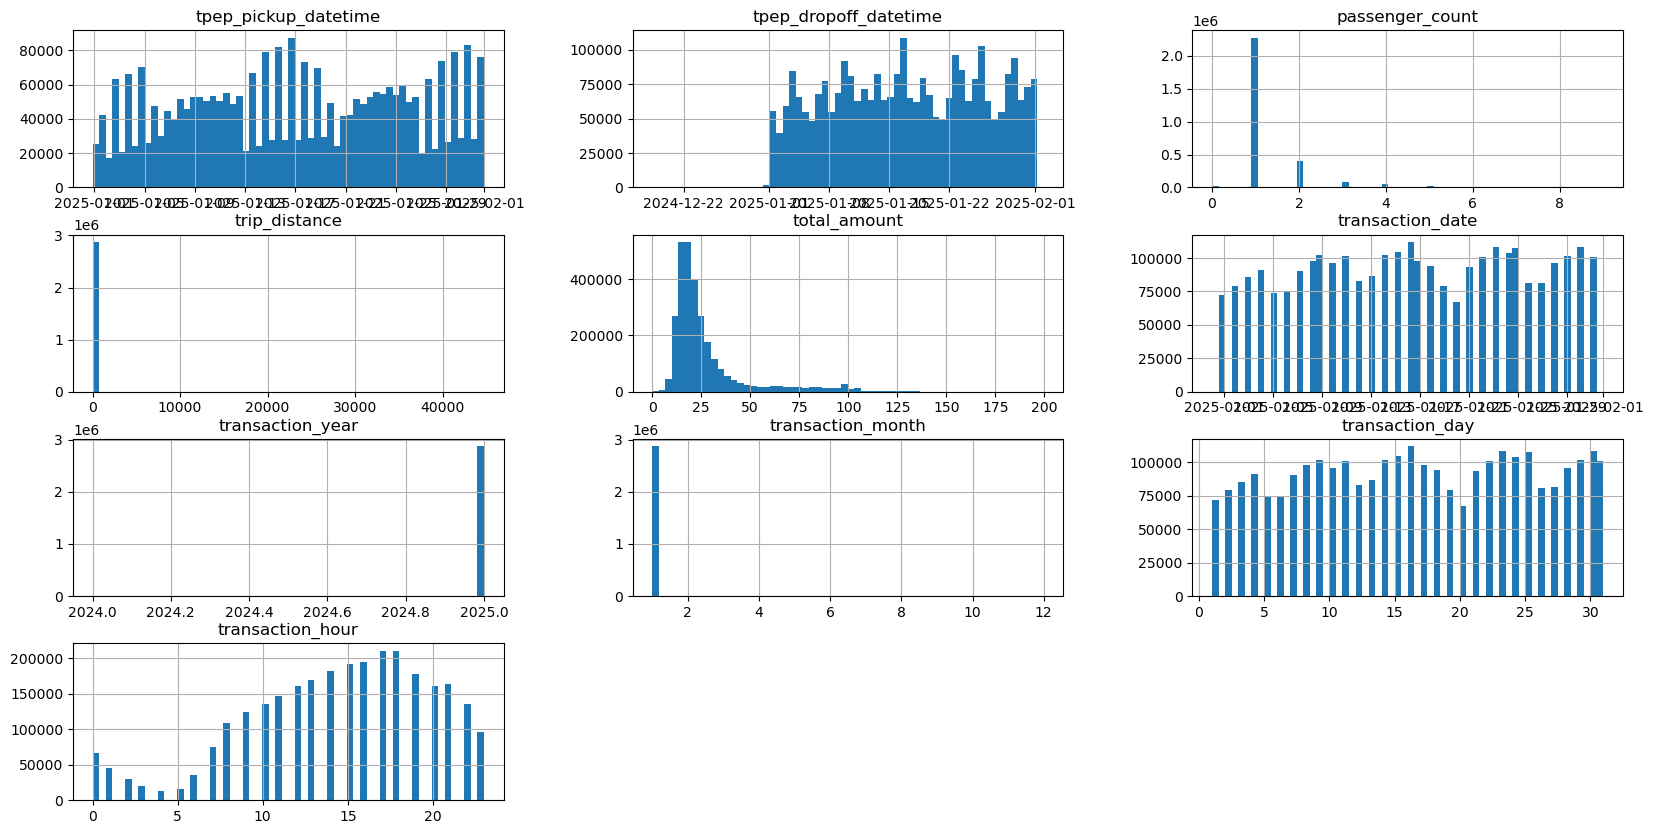

In [51]:
plt.show()

In [52]:
taxi_data_prepared[taxi_data_prepared['transaction_year']==2024].value_counts()

tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  transaction_date  transaction_year  transaction_month  transaction_day  transaction_hour
2024-12-31 20:47:55   2024-12-31 20:54:00    2                1.72           1.0         48            246           1             17.16         2024-12-31        2024              12                 31               20                  1
2024-12-31 23:37:42   2024-12-31 23:43:10    1                0.92           1.0         229           141           1             14.03         2024-12-31        2024              12                 31               23                  1
2024-12-31 23:55:37   2025-01-01 00:01:26    1                1.12           1.0         56            56            2             10.40         2024-12-31        2024              12                 31               23                  1
2024-12-31 23:53:51   2025-01-01 00:16:32    1   

In [53]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2025]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [54]:
taxi_data_prepared.shape

(2873527, 14)

In [55]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [56]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2873527, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,229,2025-01-01,1,1,0,1.60,18.00
1,236,2025-01-01,1,1,0,0.50,12.12
2,141,2025-01-01,1,1,0,0.60,12.10
3,244,2025-01-01,1,1,0,0.52,9.70
4,244,2025-01-01,1,1,0,0.66,8.30


In [57]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(75880, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.100000,115.000,1
1,1,2025-01-01,1,1,9,0.000000,132.510,4
2,1,2025-01-01,1,1,12,0.000000,106.200,2
3,1,2025-01-01,1,1,13,1.333333,56.400,3
4,1,2025-01-01,1,1,14,2.160000,70.205,2


In [58]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

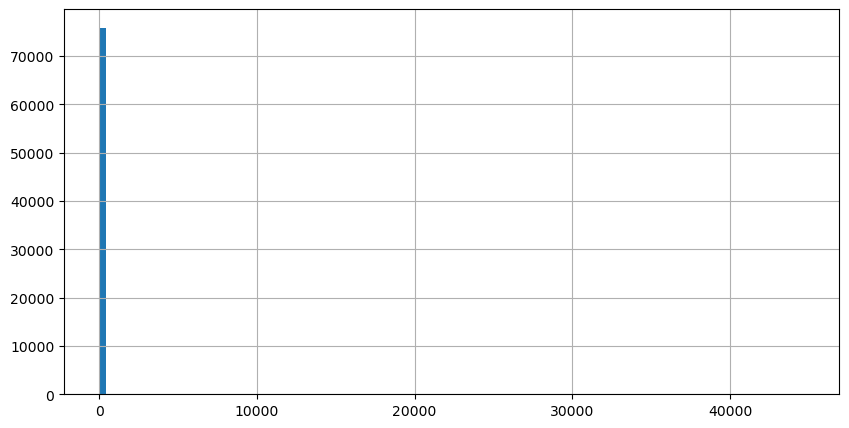

In [59]:
plt.show()

In [60]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

<Axes: >

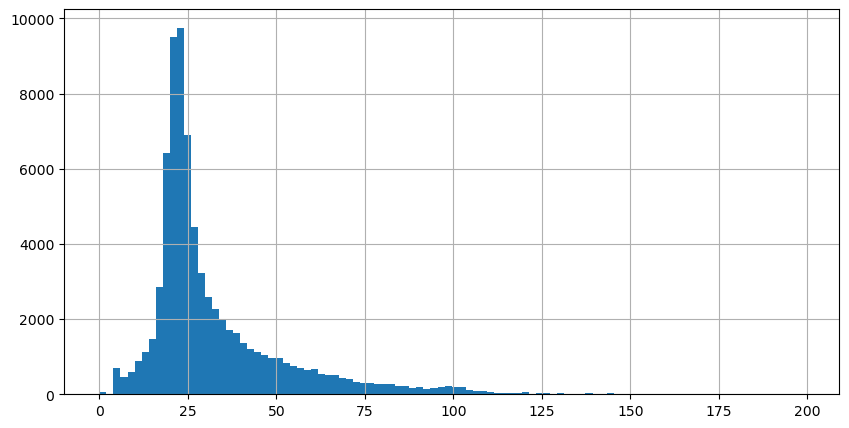

In [61]:
plt.show()

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [62]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [63]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.100000,115.000,1
1,1,2025-01-01,1,1,9,0.000000,132.510,4
2,1,2025-01-01,1,1,12,0.000000,106.200,2
3,1,2025-01-01,1,1,13,1.333333,56.400,3
4,1,2025-01-01,1,1,14,2.160000,70.205,2
...,...,...,...,...,...,...,...,...
75875,98,2025-01-30,1,30,13,1.300000,19.000,1
75876,98,2025-01-30,1,30,16,9.900000,36.000,1
75877,98,2025-01-30,1,30,18,0.000000,72.000,1
75878,98,2025-01-31,1,31,9,10.900000,36.000,1


In [64]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

## 5.1 Train-Test split

In [65]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

## 5.2 Fit a model to the data

In [66]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

## 5.3 Model Evaluation

In [67]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 6.72660131114556
mean_squared_error 183.84887497074493
root_mean_squared_error 13.55908827948048
r2 0.5738976690018203


In [68]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: xlabel='true', ylabel='pred'>

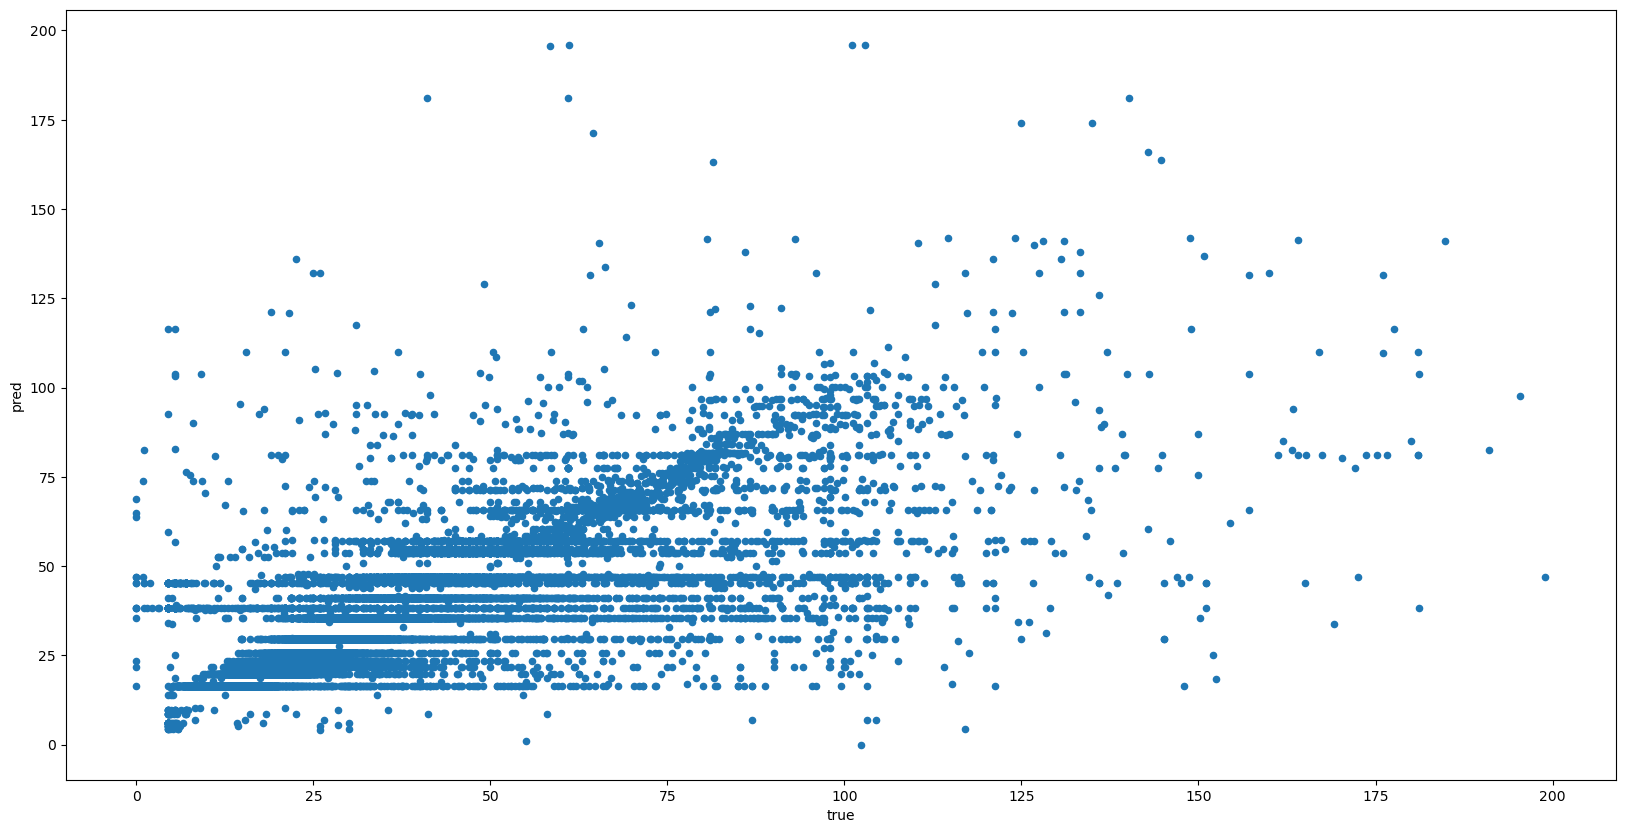

In [69]:
plt.show()

## 5.4 Fix Problems

In [70]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 12.106458778781116
mean_squared_error 324.98730508493423
root_mean_squared_error 18.02740428028767
r2 0.24678435881893512


In [71]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: xlabel='true', ylabel='pred'>

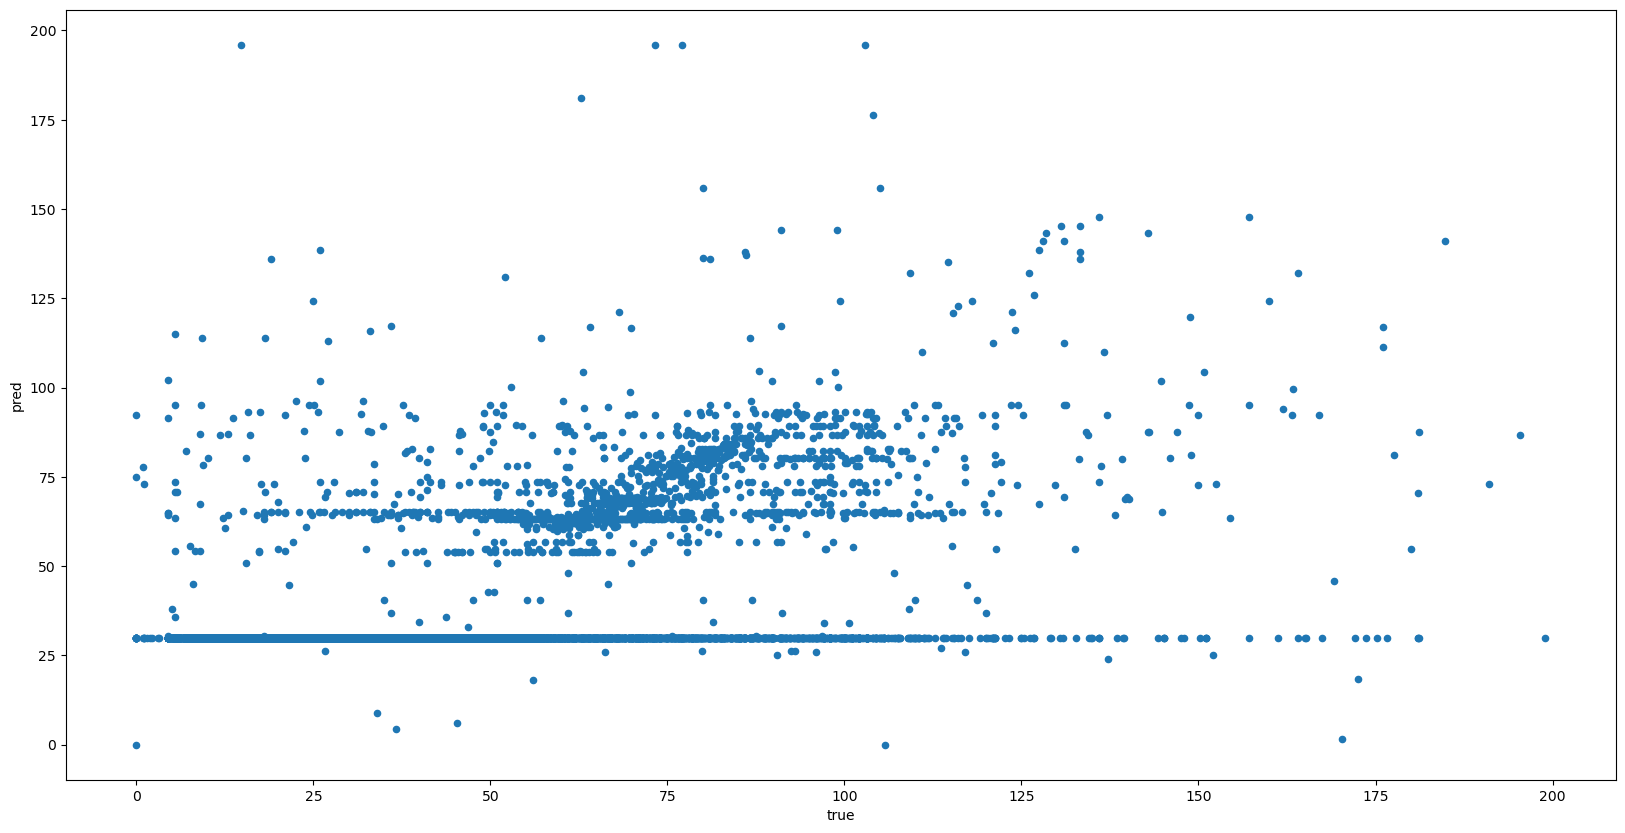

In [72]:
plt.show()

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [73]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.100000,115.000,1
1,1,2025-01-01,1,1,9,0.000000,132.510,4
2,1,2025-01-01,1,1,12,0.000000,106.200,2
3,1,2025-01-01,1,1,13,1.333333,56.400,3
4,1,2025-01-01,1,1,14,2.160000,70.205,2


In [74]:
data_with_new_features = taxi_grouped_by_region.copy()

### Date related Features

In [75]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)


In [76]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False


In [77]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/2463167083.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [78]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,False
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,False
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,False
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,False
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,False


#### Borough Information

In [79]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [80]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,False,EWR
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,False,EWR
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,False,EWR
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,False,EWR
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,False,EWR


In [81]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        41416
Brooklyn         14112
Queens           13682
Bronx             5128
Unknown            685
EWR                230
Staten Island       83
Name: count, dtype: int64

### Weather-related Features

In [82]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2025 22:00,6.1,65,6,100%.,0.3
1,31.12.2025 19:00,6.7,71,5,70 - 80%.,NaN
2,31.12.2025 16:00,7.2,66,5,50%.,NaN
3,31.12.2025 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2025 10:00,4.4,83,2,100%.,Trace of precipitation


In [83]:
nyc_weather.shape

(2936, 6)

In [84]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [85]:
nyc_weather['cloud cover'].value_counts()

cloud cover
70 - 80%.                                                     973
100%.                                                         896
20-30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [86]:
nyc_weather['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2                          49
1                          45
0.5                        42
0.8                        42
4                          33
5                          24
3                          23
6                          19
7                          13
8                          13
9                          11
10                         10
13                          7
12                          7
15                          6
11                          5
16                          3
22                          2
14                          2
29                          2
63                          1
21                          1
68                          1
17                          1
20                          1
30                          1
35                          1
34                          1
24                          1
18                          1
25              

In [87]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [88]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/3281803556.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['amount of precipitation'].interpolate(inplace=True)


In [94]:
nyc_weather.isna().sum()

date and time              0
temperature                0
humidity                   0
wind speed                 0
cloud cover                4
amount of precipitation    0
dtype: int64

In [96]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 - 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20-30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/2284931801.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20-30%.', 0.3)
/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/2284931801.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation 

In [97]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [101]:
#nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])
#nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
#nyc_weather['month'] = nyc_weather['date and time'].dt.month
#nyc_weather['day'] = nyc_weather['date and time'].dt.day

# First, let's check the actual column name (case sensitive)
# Assuming 'date and time' is the correct column name, but let's make sure
print(nyc_weather.columns.tolist())

# Convert the column to datetime format with error handling
nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'], errors='coerce')

# Check for NaT (Not a Time) values that might indicate conversion problems
print(nyc_weather['date and time'].isna().sum())

# Now extract the datetime components
#nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
#nyc_weather['month'] = nyc_weather['date and time'].dt.month
#nyc_weather['day'] = nyc_weather['date and time'].dt.day

# If there are many NaT values, you might want to investigate the original data format
# Uncomment to see problematic rows:
# print(nyc_weather[nyc_weather['date and time'].isna()].head())

['date and time', 'temperature', 'humidity', 'wind speed', 'cloud cover', 'amount of precipitation']
0


In [104]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [108]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])

In [109]:
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [110]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2025-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2025-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2025-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2025-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2025-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [111]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,False,EWR
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,False,EWR
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,False,EWR
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,False,EWR
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,False,EWR


In [112]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(75880, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,...,EWR,2025-01-01 13:00:00,12.2,51.0,9.0,0.7,0.446667,13.0,1.0,1.0
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [114]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,False,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,False,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,False,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,False,EWR,12.2,51.0,9.0,0.7,0.446667
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,False,EWR,NaN,NaN,NaN,NaN,NaN


In [115]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                      544
temperature                48543
humidity                   48543
wind speed                 48543
cloud cover                48543
amount of precipitation    48543
dtype: int64

In [116]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [117]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/1400942564.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
/var/folders/pn/79wsbmcx5b76v4qktdt07ldm0000gn/T/ipykernel_38301/1400942564.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [118]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,100,2025-01-01,1,1,0,4.487778,48.684444,9,2,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0
1,106,2025-01-01,1,1,0,1.510000,14.500000,1,2,False,False,Brooklyn,8.3,97.0,0.0,1.0,29.0
2,107,2025-01-01,1,1,0,2.591402,25.397500,164,2,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0
3,112,2025-01-01,1,1,0,3.865000,39.290000,2,2,False,False,Brooklyn,8.3,97.0,0.0,1.0,29.0
4,113,2025-01-01,1,1,0,2.500463,25.386389,108,2,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0


In [119]:
nyc_taxi_with_weather.shape

(75880, 17)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [124]:
data_for_model = nyc_taxi_with_weather.copy()

In [126]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

### Train-Test split

In [127]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 7.1. Decision tree <a id='decision_tree'></a>

In [128]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10) #max_depth = 10 prevents the model from Overfitting, explanation below.
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [129]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 10.067250676242887
mean_squared_error 282.46245325168513
root_mean_squared_error 16.806619328457614
r2 0.3432232723707387


In [130]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: xlabel='true', ylabel='pred'>

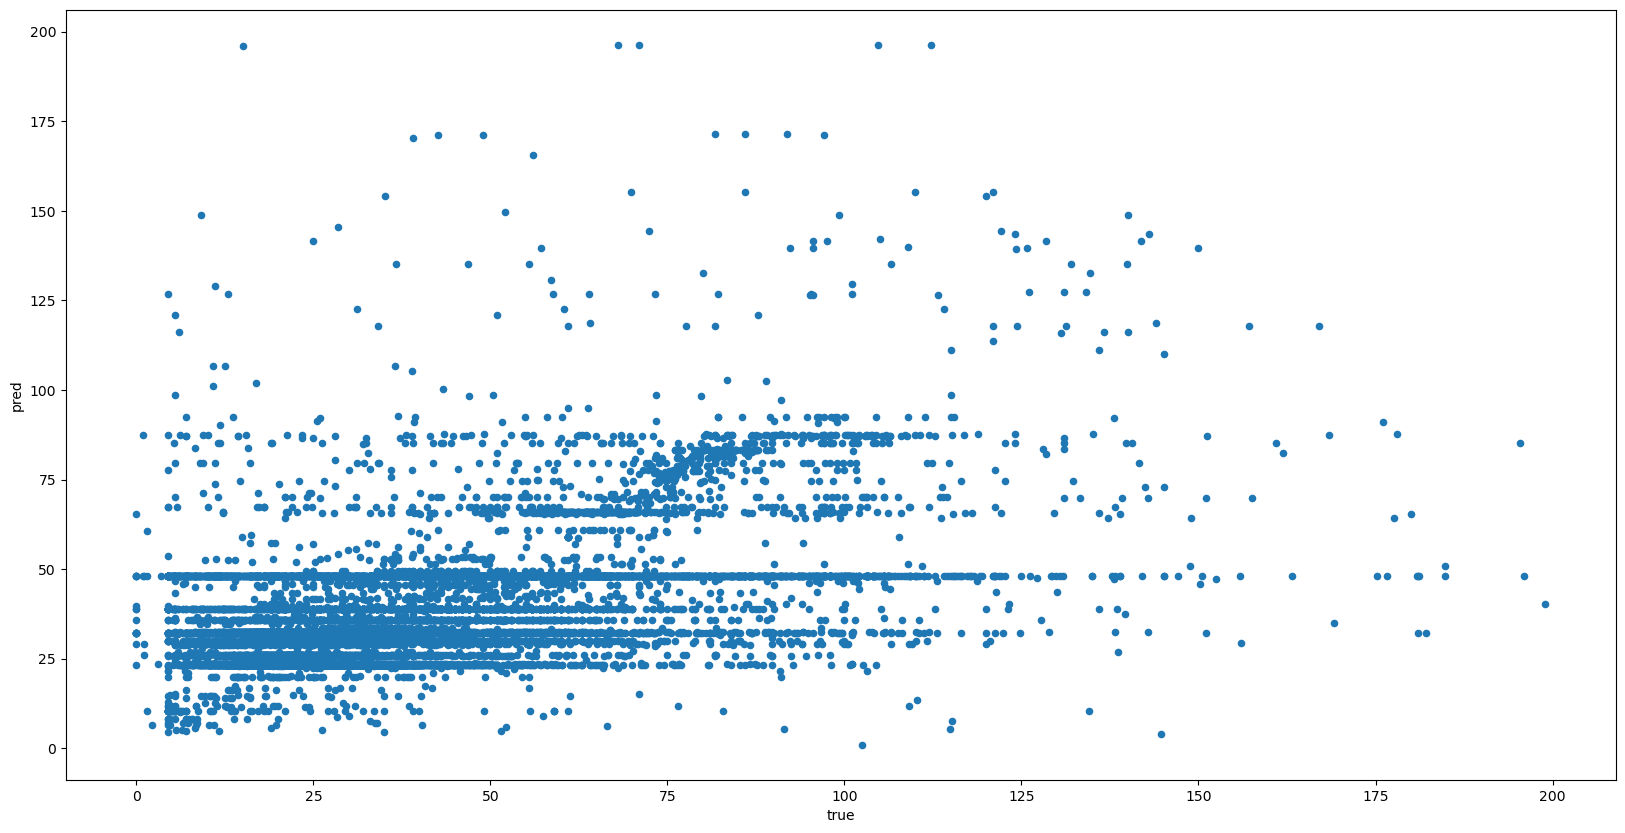

In [131]:
plt.show()

## Overfit

In [132]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [133]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [134]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.783183e+01,18.008530
1,5,1.639354e+01,16.736620
2,8,1.560713e+01,16.683682
3,10,1.501325e+01,16.820719
4,15,1.354653e+01,17.250200
5,20,1.220465e+01,17.857933
6,30,9.394928e+00,19.339973
7,50,3.354970e+00,20.978167
8,70,6.362651e-01,21.231506
9,100,5.500713e-17,21.106710


In [135]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

Text(0, 0.5, 'root mean squared error')

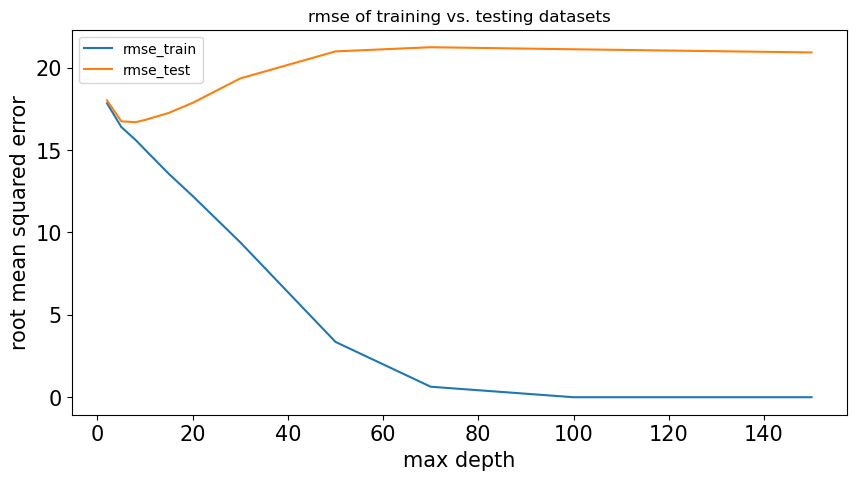

In [136]:
plt.show()

### INSIGHTS about Overfitting
#### It appears at the beginning (when max-depth is between 2 and 10) that the rmse_test score is going down, however when the max-depth keeps going up (10+) the rmse_test result starts getting higher, which means the model loses its ability to generalize the analysis, thus not scoring correctly for new data points it continues analyzing.

#### In general Decision Trees tend to overfit so it is advisable to use other models to compare scoring.

## Underfit

### Underfitting is when the model cannot capture the data's pattern at all; it cannot understand the complexity of the model.

In [137]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [143]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1) #max_depth = 1 is too shallow
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 12.343388961180722
mean_squared_error 346.14411675985974
root_mean_squared_error 18.60494871693711
r2 0.1773464833229822


In [144]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 12.435252267836947
mean_squared_error 352.0592775027117
root_mean_squared_error 18.763242723546263
r2 0.181397960869075


## 7.2. Random forest <a id='random_forest'></a>

In [145]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [146]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.363987565814655
mean_squared_error 258.9140158516522
root_mean_squared_error 16.090805320171274
r2 0.3979776847831922


In [147]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: xlabel='true', ylabel='pred'>

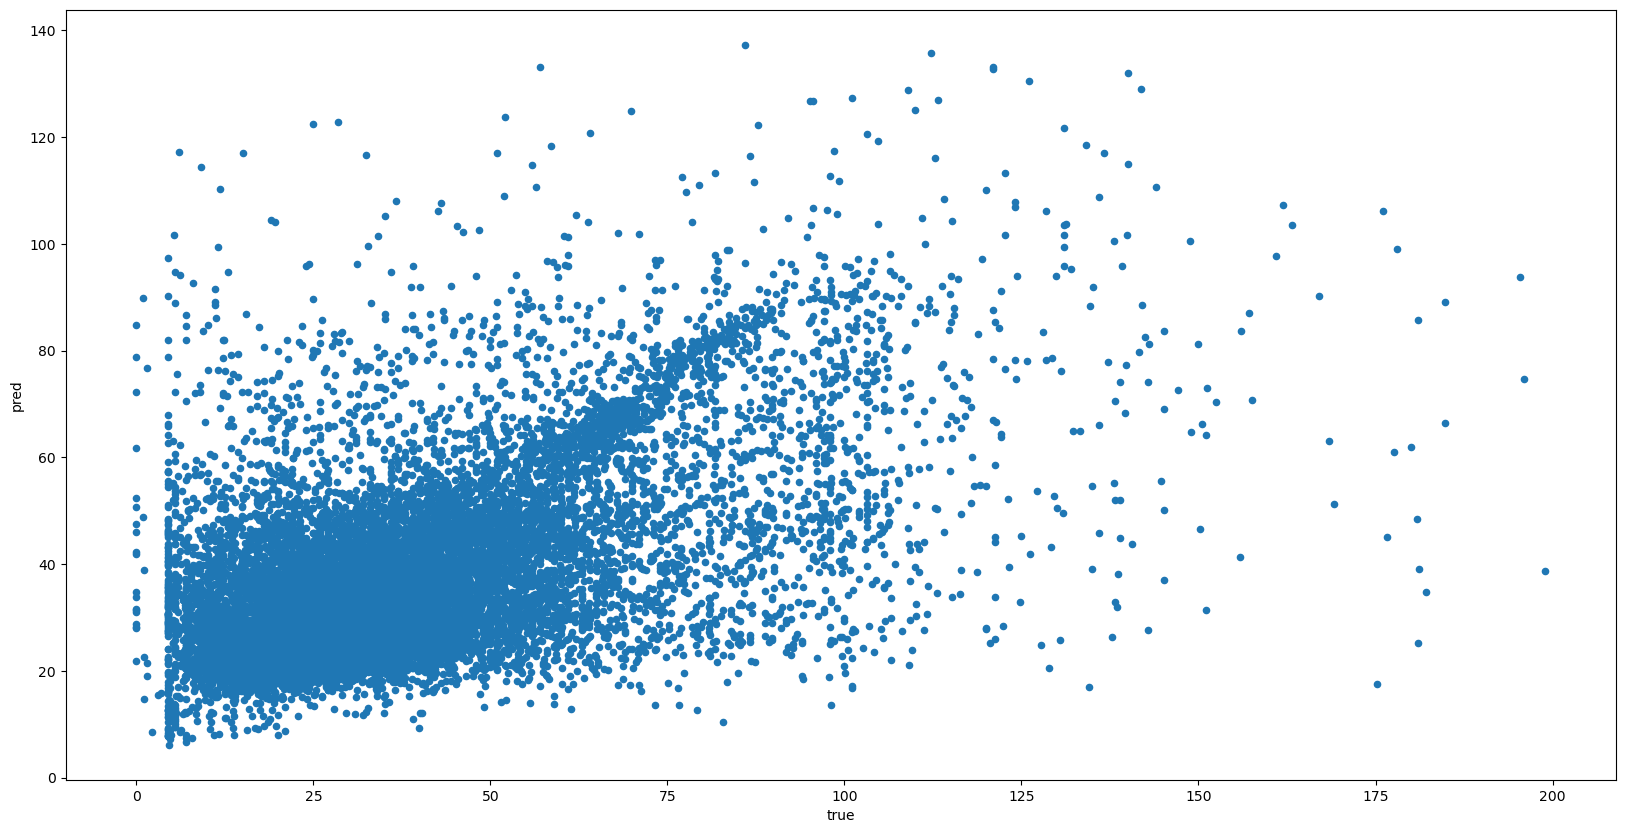

In [148]:
plt.show()

## 7.3 Gradient Boosting

In [149]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [150]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.93531905769145
mean_squared_error 250.76965653243522
root_mean_squared_error 15.835708273785395
r2 0.4169148058084281


In [151]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: xlabel='true', ylabel='pred'>

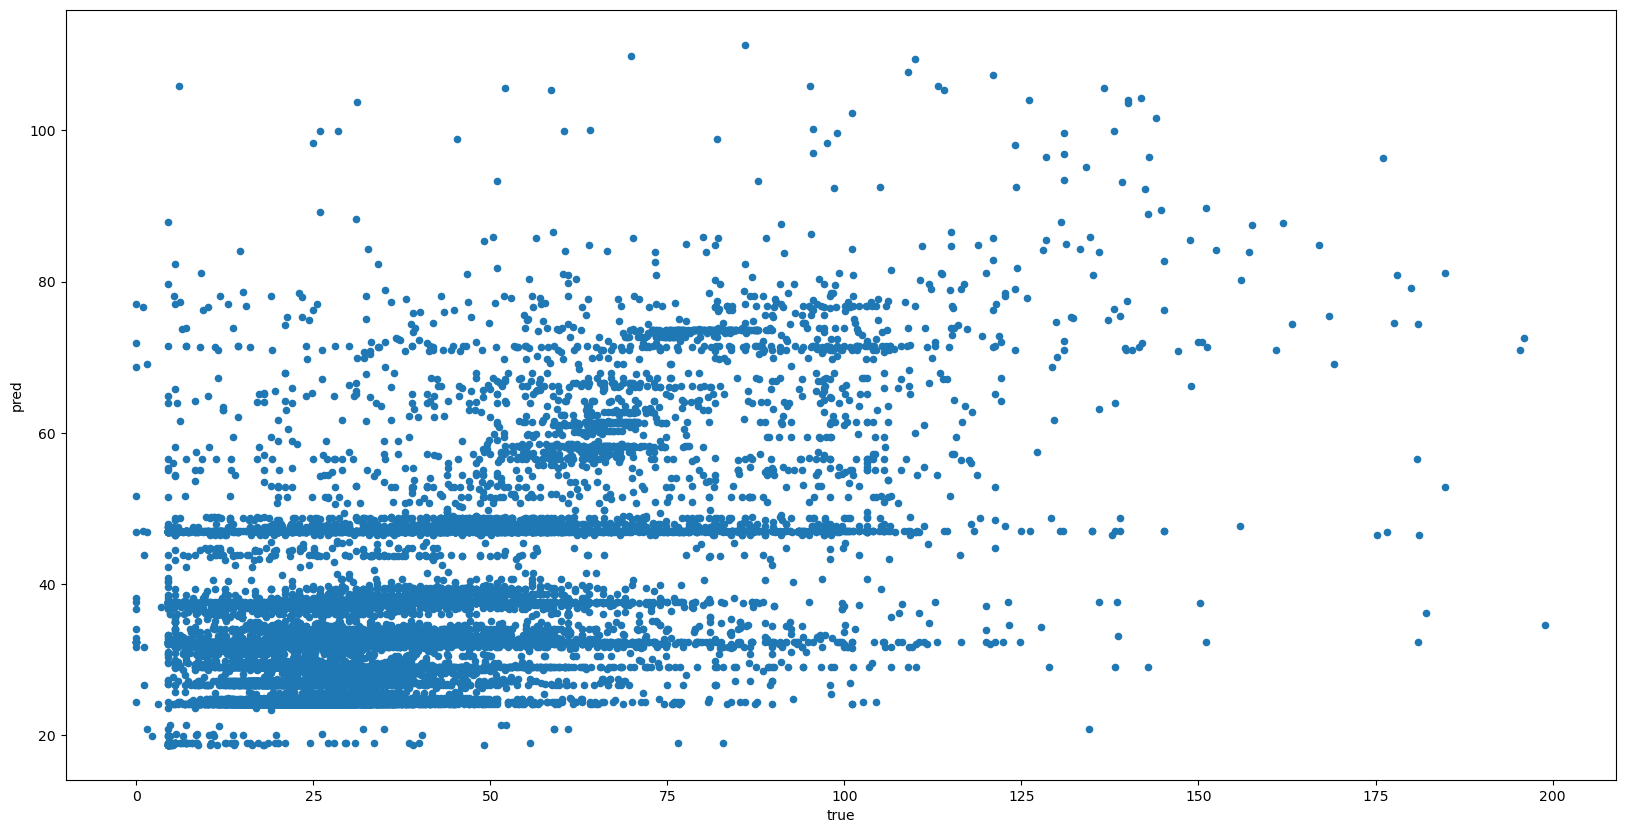

In [152]:
plt.show()

In [153]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

<Axes: >

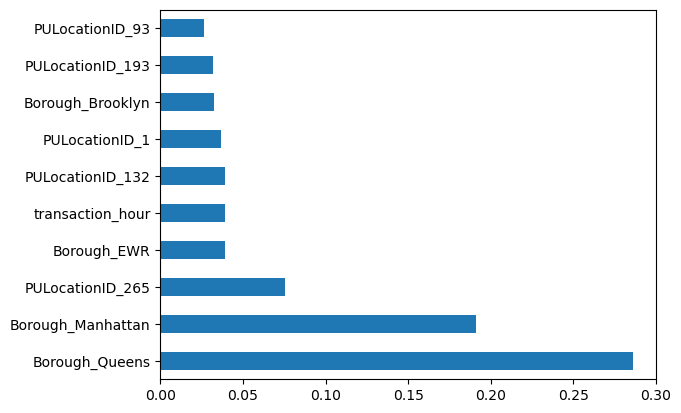

In [154]:
plt.show()

## 7.4. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

In [ ]:
{
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "| Algorithm         |  MAE  |  RMSE  |   R2   |\n",
    "|-------------------|:-----:|:------:|:------:|\n",
    "| Benchmark model   | 9.778 | 14.739 |  0.225 |\n",
    "| Decision tree     | 8.534 | 14.011 |  0.308 |\n",
    "| Random forest     | 7.426 | 13.212 |  0.385 |\n",
    "| Gradient boosting | 8.388 | 13.378 |  0.369 |"
   ]
  },

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

In [155]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [156]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [157]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-packag

In [158]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,24.952188,0.102182,1.689983,0.109769,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.444574,0.451743,0.435801,0.444039,0.006519,2
1,7.853848,0.207552,0.306850,0.038982,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.416311,0.415074,0.402553,0.411313,0.006215,6
2,10.297887,0.198488,0.288900,0.013353,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.418483,0.418661,0.403244,0.413462,0.007226,5
3,0.020858,0.003537,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.014799,0.004710,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,158.898896,0.583883,15.004408,0.687674,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.425247,0.432037,0.418455,0.425246,0.005545,4
6,27.302535,0.390159,0.734496,0.043652,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.334835,0.330477,0.320247,0.328520,0.006114,7
7,85.070928,1.215964,4.415766,0.347059,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.444849,0.444775,0.431650,0.440425,0.006205,3
8,0.015281,0.007708,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,67.651072,8.698281,3.485779,0.579745,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.456727,0.459755,0.446274,0.454252,0.005775,1


In [159]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  108.26274394989014  seconds
mean_absolute_error 9.207177954972623
mean_squared_error 235.96231264076303
root_mean_squared_error 15.36106482769873
r2 0.4513445813559347


In [160]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  12.549753189086914  seconds
mean_absolute_error 9.1353937023499
mean_squared_error 234.34190973191434
root_mean_squared_error 15.308230130616483
r2 0.45511231369580185


In [161]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: xlabel='true', ylabel='pred'>

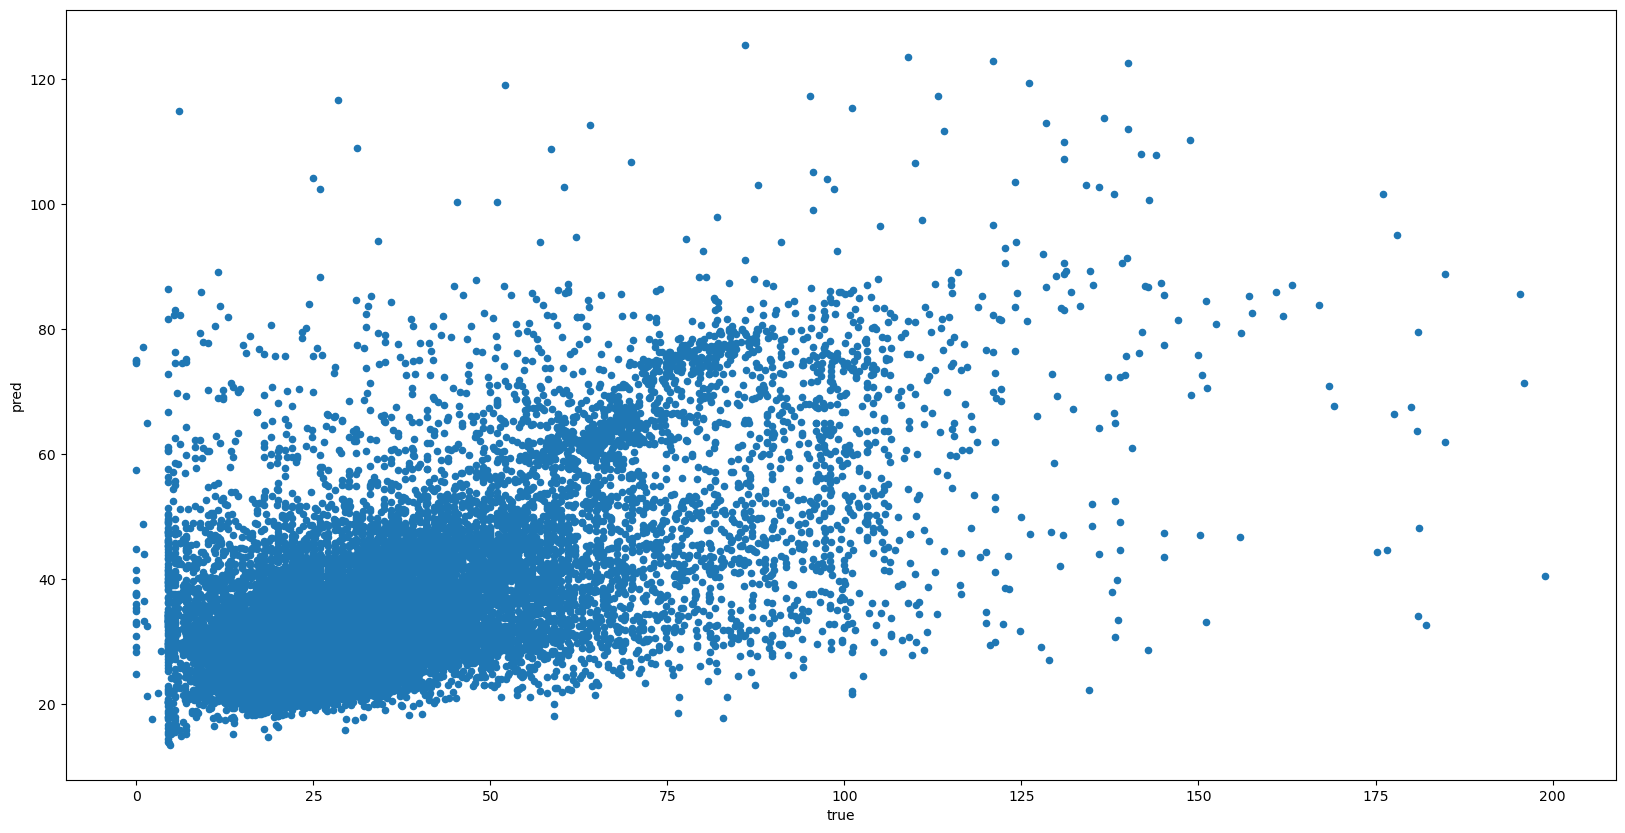

In [162]:
plt.show()

# Bonus: Classification

### Transforming a Regression problem into a Classification problem

In [163]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

<Axes: >

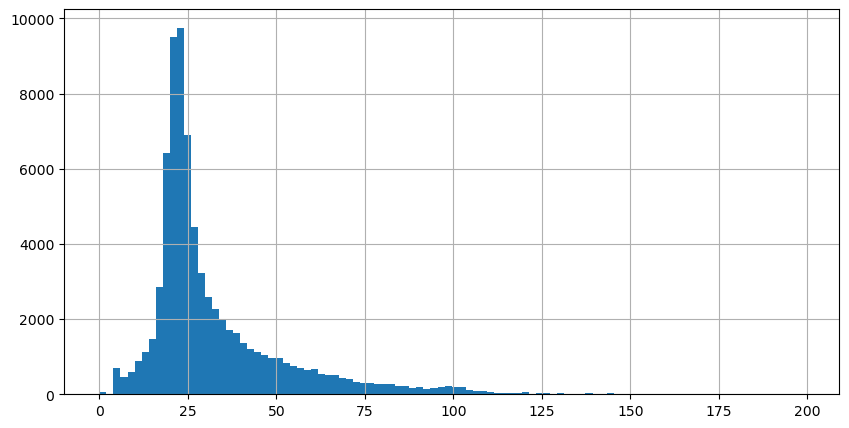

In [164]:
plt.show()

In [193]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=20 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,100,2025-01-01,1,1,0,4.487778,48.684444,9,2,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
1,106,2025-01-01,1,1,0,1.510000,14.500000,1,2,False,False,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0
2,107,2025-01-01,1,1,0,2.591402,25.397500,164,2,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
3,112,2025-01-01,1,1,0,3.865000,39.290000,2,2,False,False,Brooklyn,8.3,97.0,0.0,1.0,29.0,high,1
4,113,2025-01-01,1,1,0,2.500463,25.386389,108,2,False,False,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1


In [195]:
nyc_class['earning_class'].value_counts()

earning_class
high    60476
low     15404
Name: count, dtype: int64

In [196]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'earning_class_binary'

In [197]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [198]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [200]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[ 1322  3696]
 [ 1187 18836]]
accuracy 0.804999800327463
precision 0.8359666252440973
recall 0.9407181740997852


In [201]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

<Axes: >

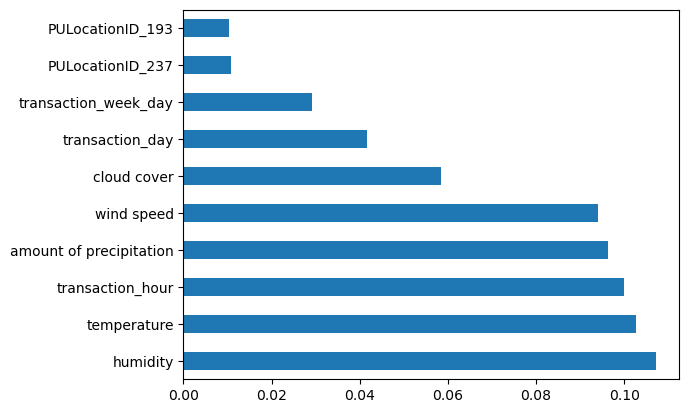

In [202]:
plt.show()

# The End